## Imports

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import skew

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import os

## EDA

In [162]:
train_dt = pd.read_csv('./data/train.csv',low_memory = False)
test_dt = pd.read_csv('./data/train.csv',low_memory = False)

print(f'Train shape : {train_dt.shape}')
print(f'Test shape : {test_dt.shape}')

Train shape : (1460, 81)
Test shape : (1460, 81)


In [163]:
train_dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [164]:
test_dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [165]:
train_dt.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [166]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [167]:
train_dt.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [168]:
train_dt.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

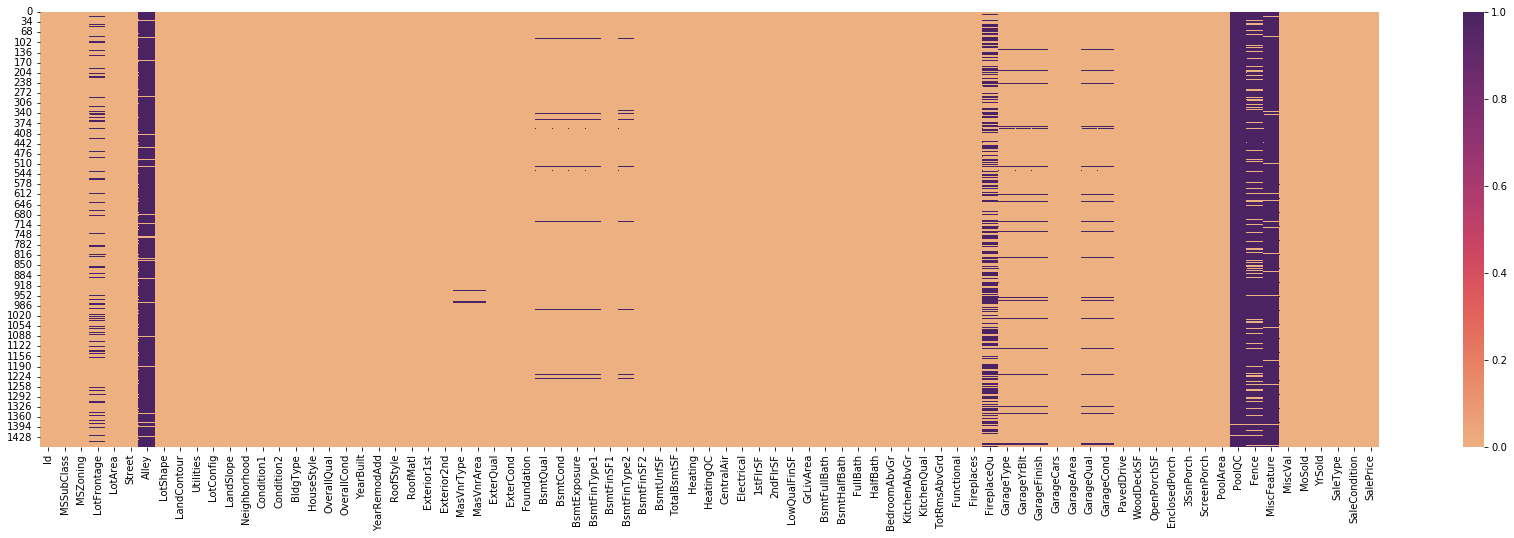

In [169]:
#Visualizing the null values in all columns
plt.figure(figsize=(30,8));
sns.heatmap(train_dt.isnull(), cmap='flare');

In [170]:
#Columns containing most null values
total = train_dt.isnull().sum().sort_values(ascending=False)
percent = (train_dt.isnull().sum() / train_dt.isnull().count()*100).sort_values(ascending=False)
missing_dt = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])
print(train_dt.shape)
missing_dt.head(10)

(1460, 81)


,Total Missing,Percent Missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [171]:
corr = train_dt.corr()
highly_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
highly_corr_features = highly_corr_features[highly_corr_features != 'SalePrice']
highly_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

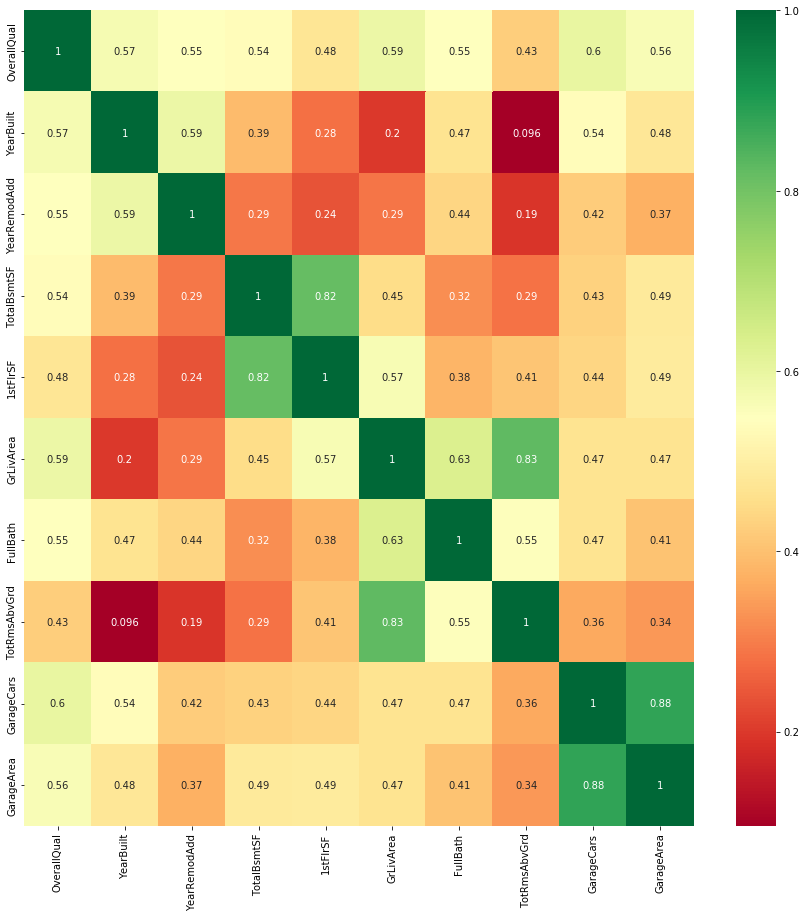

In [172]:
plt.figure(figsize=(15,15))
map = sns.heatmap(train_dt[highly_corr_features].corr(),annot=True,cmap="RdYlGn")

### Data Description of highly correlated features

### OverallQual  
Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
### YearBuilt  
Original construction date

### YearRemodAdd  
Remodel date (same as construction date if no remodeling or additions)

### TotalBsmtSF  
Total square feet of basement area

### 1stFlrSF  
First Floor square feet

### GrLivArea  
Above grade (ground) living area square feet

### FullBath  
Full bathrooms above grade

### TotRmsAbvGrd  
Total rooms above grade (does not include bathrooms)

### GarageYrBlt  
Year garage was built

### GarageCars  
Size of garage in car capacity

### GarageArea  
Size of garage in square feet

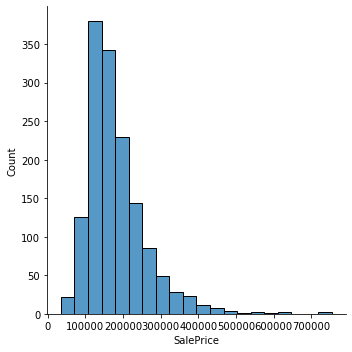

In [173]:
sns.displot(train_dt['SalePrice'],bins=20)

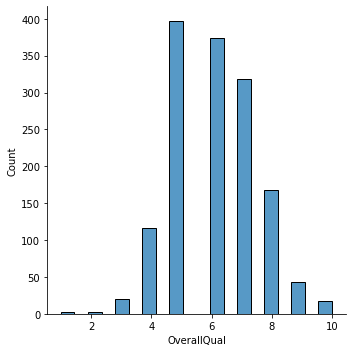

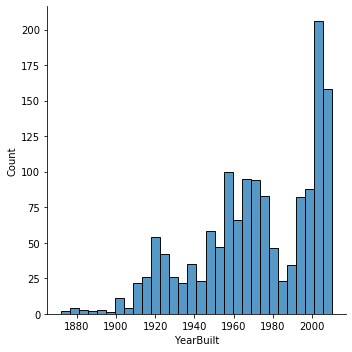

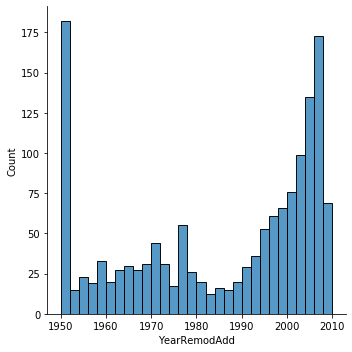

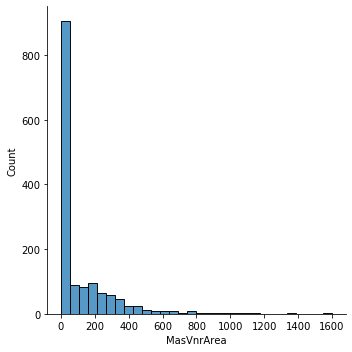

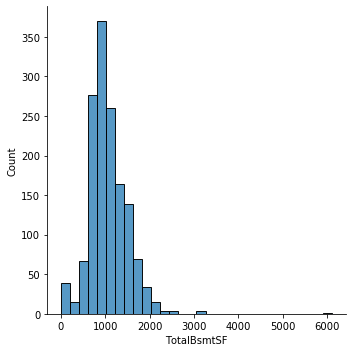

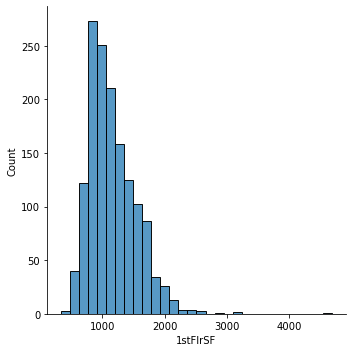

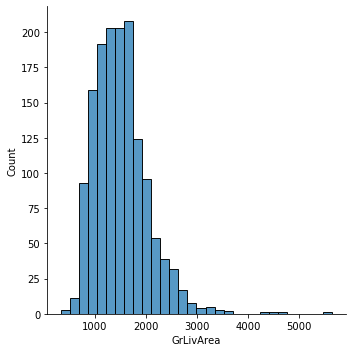

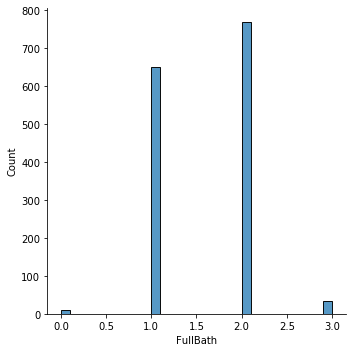

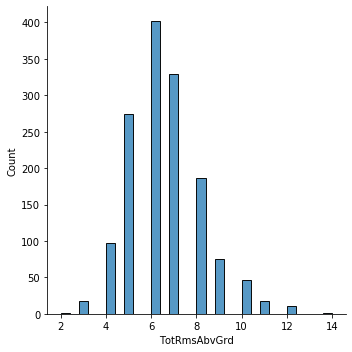

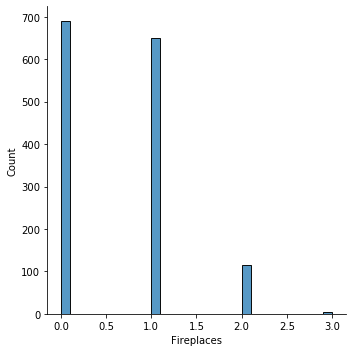

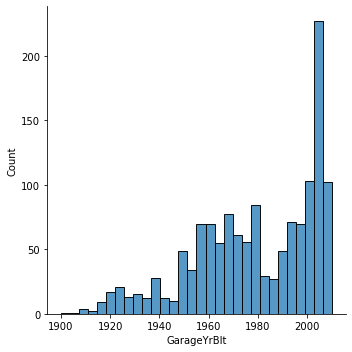

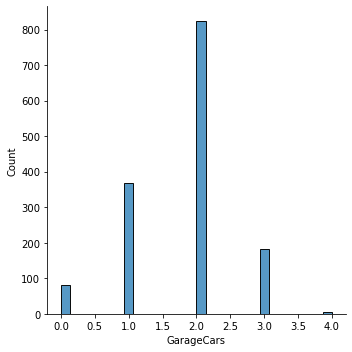

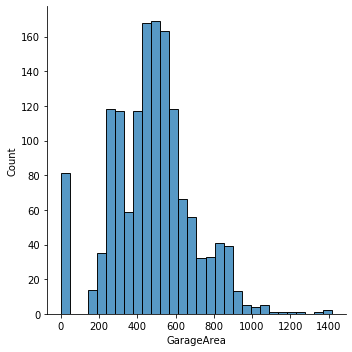

In [174]:
sns.displot(train_dt['OverallQual'],bins=20)
sns.displot(train_dt['YearBuilt'],bins=30)
sns.displot(train_dt['YearRemodAdd'],bins=30)
sns.displot(train_dt['MasVnrArea'],bins=30)
sns.displot(train_dt['TotalBsmtSF'],bins=30)
sns.displot(train_dt['1stFlrSF'],bins=30)
sns.displot(train_dt['GrLivArea'],bins=30)
sns.displot(train_dt['FullBath'],bins=30)
sns.displot(train_dt['TotRmsAbvGrd'],bins=30)
sns.displot(train_dt['Fireplaces'],bins=30)
sns.displot(train_dt['GarageYrBlt'],bins=30)
sns.displot(train_dt['GarageCars'],bins=30)
sns.displot(train_dt['GarageArea'],bins=30)

In [175]:
train_dt['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

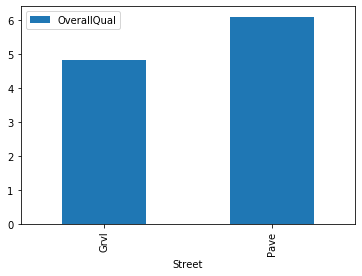

In [176]:
# In terms of overall quality the best street to buy a house in.
Street_pivot = train_dt.pivot_table(index ="Street", values = 'OverallQual')
Street_pivot.plot.bar()

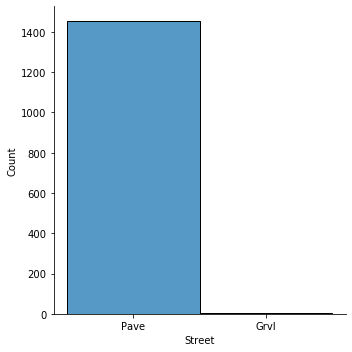

In [177]:
sns.displot(train_dt['Street'],bins=2)

In [178]:
print(train_dt['Neighborhood'].unique())
len(train_dt['Neighborhood'].unique())

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


25

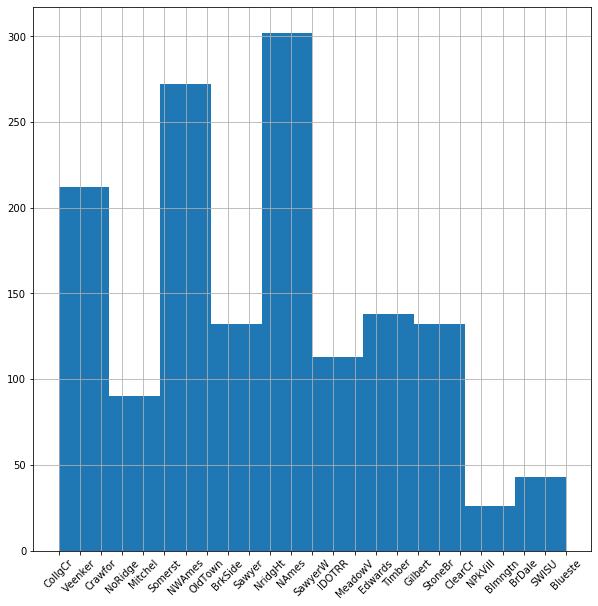

In [179]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
train_dt['Neighborhood'].hist()

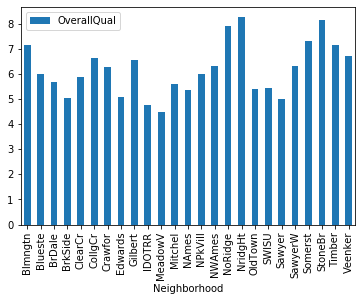

In [180]:
# In terms of overall quality the best neighborhood to buy a house in.
NBH_pivot = train_dt.pivot_table(index ="Neighborhood", values = 'OverallQual')
NBH_pivot.plot.bar()

6
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


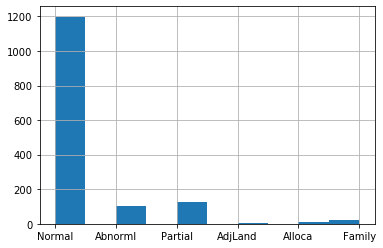

In [181]:
print(len(train_dt['SaleCondition'].unique()))
print(train_dt['SaleCondition'].unique())
train_dt['SaleCondition'].hist()

### Data Description  
### SaleCondition 
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


5
['RL' 'RM' 'C (all)' 'FV' 'RH']


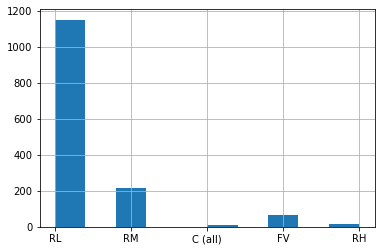

In [182]:
print(len(train_dt['MSZoning'].unique()))
print(train_dt['MSZoning'].unique())
train_dt['MSZoning'].hist()

### Data Description
### MSZoning
Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density


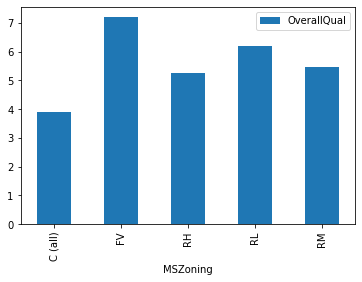

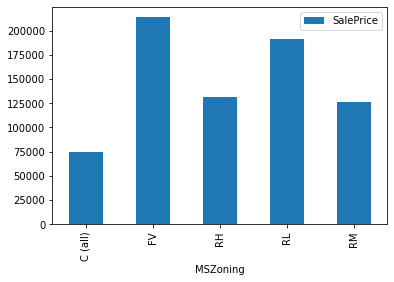

In [183]:
MSZ_pivot = train_dt.pivot_table(index ="MSZoning", values = 'OverallQual')
MSZ_pivot.plot.bar()
MSZ_pivot = train_dt.pivot_table(index ="MSZoning", values = 'SalePrice')
MSZ_pivot.plot.bar()

## Feature Engineering

In [185]:
# Dropping ID column
train_id = train_dt['Id']
train_dt = train_dt.drop(['Id'],axis=1)

In [186]:
y_train = train_dt['SalePrice']
x_train = train_dt.drop('SalePrice', axis =1)

In [187]:
# Dropping features who have null values >500
features = []
nullValues = []
for i in x_train:
    if (x_train.isna().sum()[i])>500 and i!='SalePrice':
        features.append(i)
        nullValues.append(x_train.isna().sum()[i])
print(features)

x_train = x_train.dropna(axis=1, how='any', thresh = 1000)
x_train.shape

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


(1460, 74)

In [188]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [189]:
# We will fill numerically missing values with median and categorical values with mode
x_train_num = x_train.select_dtypes(include = ['float', 'int64'])
x_train_cat = x_train.select_dtypes(include = ['object'])

In [190]:
# Creating custom transformer to select features

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self , feature_names):
        self._feature_names = feature_names
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X , y =None):
        return X[self._feature_names]

In [191]:
### Create a pipeline  then change the label encoder into one hot encoders

num_attributes = list(x_train_num)
categorical_atrributes = list(x_train_cat)

num_pipeline = Pipeline( steps = [
    ('selector', FeatureSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder(handle_unknown='ignore'))
])


full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', categorical_transformer)
])

In [192]:
x_train_final = full_pipeline.fit_transform(x_train)
# test_dt_final =  full_pipeline.transform(test_dt)

## Test Data Preparation

In [193]:
test_dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [194]:
# Dropping ID column
test_id = test_dt['Id']
test_dt = test_dt.drop(['Id'],axis=1)

In [195]:
y_test = train_dt['SalePrice']
x_test = train_dt.drop('SalePrice', axis =1)

In [196]:
features = []
nullValues = []
for i in x_test:
    if (x_test.isna().sum()[i])>500 and i!='SalePrice':
        features.append(i)
        nullValues.append(x_test.isna().sum()[i])
print(features)

x_test = x_test.dropna(axis=1, how='any', thresh = 1000)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [197]:
x_test_final =  full_pipeline.transform(x_test)

## Training Models

In [154]:
gbrt = GradientBoostingRegressor(n_estimators=15000, max_depth=4, min_samples_leaf=15, min_samples_split=10, learning_rate=0.01, loss='huber', random_state=5)

gbrt.fit(x_train_final , y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          min_samples_leaf=15, min_samples_split=10,
                          n_estimators=15000, random_state=5)

In [200]:
rfrt = RandomForestRegressor(n_estimators=300)
rfrt.fit(x_train_final , y_train)

RandomForestRegressor(n_estimators=300)

## Error and Accuracy

In [206]:
print(gbrt.score(x_train_final , y_train))
print(gbrt.score(x_test_final , y_test))

0.9799200301578169
0.9799200301578169


In [207]:
print(rfrt.score(x_train_final , y_train))
print(rfrt.score(x_test_final , y_test))

0.9815117083215501
0.9815117083215501


In [208]:
gbrt_predictions = gbrt.predict(x_train_final)
gbrt_mse = mean_squared_error(y_train, gbrt_predictions)
gbrt_rmse = np.sqrt(gbrt_mse)
gbrt_rmse

11253.44945316051

In [209]:
rfrt_predictions = gbrt.predict(x_train_final)
gbrt_mse = mean_squared_error(y_train, rfrt_predictions)
gbrt_rmse = np.sqrt(gbrt_mse)
gbrt_rmse

11253.44945316051

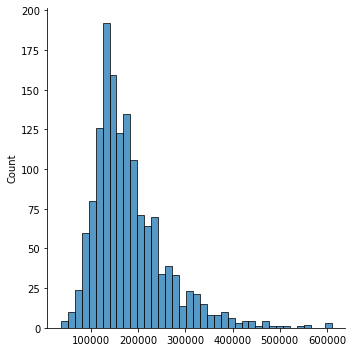

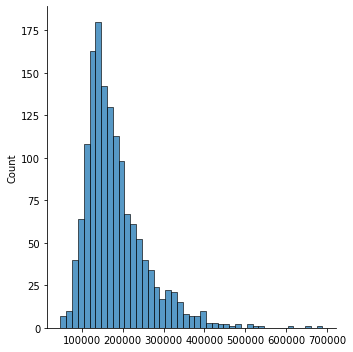

In [210]:
sns.displot(gbrt.predict(x_train_final),kde=None)
sns.displot(rfrt.predict(x_train_final),kde=None)

## Predicting

In [211]:
gbrt_target_predictions = gbrt.predict(x_test_final)
gbrt_target_predictions = np.reshape(gbrt_target_predictions, -1)
gbrt_solution = pd.DataFrame({"id":test_id, "SalePrice":gbrt_target_predictions})

rfrt_target_predictions = rfrt.predict(x_test_final)
rfrt_target_predictions = np.reshape(rfrt_target_predictions, -1)
rfrt_solution = pd.DataFrame({"id":test_id, "SalePrice":rfrt_target_predictions})

In [213]:
gbrt_solution.to_csv('gbrt_predictions.csv', index=False)
rfrt_solution.to_csv('rfrt_predictions.csv', index=False)